# 计算两个分布的贝叶斯最优分类边界并画图

生成两个由1000个样本组成的二变量高斯分布，分别服从$m_1=[0,2]^T,m_2=[1.5,0]^T$，且具有同样的协方差矩阵$C=\left[ \begin{array}{c} 2 & 1 \\ 1 & 2 \end{array} \right]$，计算两个分布的贝叶斯最优分类边界并画图

In [1]:
import numpy as np
#from numpy.linalg import cholesky
import matplotlib.pyplot as plt
# 对sequence连续使用function, 如果不给出initial, 
# 则第一次调用传递sequence的两个元素, 
# 以后把前一次调用的结果和sequence的下一个元素传递给function. 
# 如果给出initial, 则第一次传递initial和sequence的第一个元素给function.
from functools import reduce

In [2]:
sampleNo = 100
# 第一个高斯分布参数
mu = np.array([[0, 2]])
# 第二个高斯分布参数
mu1 = np.array([[1.5, 0]])
# 协方差矩阵
Sigma = np.array([[2, 1], [1, 2]])
#R = cholesky(Sigma).T
#va,vc = np.linalg.eig(Sigma); R2 = (np.diag(va)**0.5)@vc.T

## 生成高斯分布
np.random.multivariate_normal方法用于根据实际情况生成一个多元正态分布矩阵。  
def multivariate_normal(mean, cov, size=None, check_valid=None, tol=None)   
**mean：**mean是多维分布的均值维度为1；  
**cov：**协方差矩阵（协方差基本概念戳这里），注意：协方差矩阵必须是对称的且需为半正定矩阵；  
**size：**指定生成的正态分布矩阵的维度（例：若size=(1, 1, 2)，则输出的矩阵的shape即形状为 $1*1*2*N$（N为mean的长度））。

In [3]:
s1 = np.random.multivariate_normal(mu[0], Sigma, sampleNo) 
s2 = np.random.multivariate_normal(mu1[0], Sigma, sampleNo)

In [4]:
# 得到定义域范围
x = range(-100,100,1)
# 对Sigma(协方差矩阵)矩阵求逆
C = np.linalg.inv(Sigma)
w = 2*np.dot(C, mu1.T-mu.T)
b = reduce(np.dot, [mu,C,mu.T])- reduce(np.dot, [mu1,C,mu1.T])
w0 = (-w[0]/w[1])[0]
y= np.dot(w0, x)+(-b/w[1])

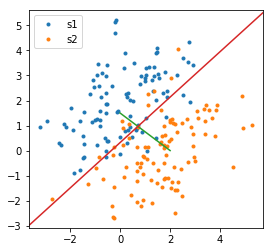

In [5]:
# 绘制s1的点集
plt.plot(*s1.T,'.',label = 's1')
# 绘制s2的点集
plt.plot(*s2.T,'.',label = 's2')
plt.axis('scaled')
# 绘制两个分布的均值连线
plt.plot(mu[0],mu1[0],'-')
# 绘制分离超平面
plt.plot(x,y[0],'-')
plt.legend()